<a href="https://colab.research.google.com/github/patternproject/sept-datadive-cdac/blob/patternproject/policyglot/Task1b-part_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VER HISTORY
### 1: First Draft for PCA Heat Map

## Task 1b_partc

## Statement of Goal:
    Explore the ACS data, reduce the dimensionality of quantitative variables and explore if can be linked to patterns in overlaps of ookla and FCC data.

# Part 1: Reduce ACS dimensionality

In [35]:
# This is a library I'm testing, there may be better ways of visualizing this data. 
# If not, this library may be added to a requirements.txt file in the Github Repo
!pip3 install bioinfokit

     |████████████████████████████████| 84 kB 2.8 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=2734bd607a0bca4706af610eeea962cda9a1873284ed76fbb658b9ed7376bd5e
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=b98f0e345f84cad2311c5c685cd8013070a842b8844b1e41e643bc57f4d597a9
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [2]:
!pip3 install geopandas

     |████████████████████████████████| 994 kB 28.1 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.3 MB 32.6 MB/s 


In [3]:
# Imports
import pandas as pd
import numpy as np
import geopandas as gpd

##Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Data Viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

There needs to be a better way to read remotely from the DataKind Folder, or the GitHub Folder

For now manually reading it from local drive

In [15]:
from google.colab import files

uploaded = files.upload()

Saving acs_2019_FL.csv to acs_2019_FL.csv


In [17]:
fpath = '/content/acs_2019_FL.csv'

In [18]:
df_acs = pd.read_csv(fpath)

In [19]:
df_acs.shape

(4245, 43)

In [20]:
from google.colab import drive
#drive.mount('/content/drive')
#drive.mount('https://drive.google.com/drive/folders/15GhF-WywcBU3GCbRsE2K_7eKEtj7YifB?usp=sharing')

In [21]:
#It would make sense to see as many of the 43 columns as possible
pd.set_option("display.max_columns", 50)

In [22]:
df_acs.head()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
0,12,1,200,12001000200,0.816,0.968,0.279,0.184,0.130,9.79,17786.0,7557.0,2583.0,81.6,96.8,18.4,13.0,17786.0,27.9,2583.0,2501.0,2109.0,7557.0,1387.0,7557.0,982.0,1876.0,524.0,2501,2109,2501,0,2109,392,82,6444,238,226,0,207,19,12,12
1,12,1,301,12001000301,0.723,0.879,0.450,0.429,0.069,10.40,33011.0,4426.0,1750.0,72.3,87.9,42.9,6.9,33011.0,45.0,1750.0,1539.0,1265.0,4426.0,1898.0,4426.0,307.0,2717.0,1222.0,1539,1265,1539,0,1254,285,211,4397,531,476,0,365,111,55,12
2,12,1,302,12001000302,0.818,0.885,0.315,0.223,0.241,10.40,32750.0,2319.0,1084.0,81.8,88.5,22.3,24.1,32750.0,31.5,1084.0,959.0,887.0,2319.0,516.0,2319.0,558.0,1710.0,539.0,959,887,959,0,887,72,125,2288,377,365,0,348,17,12,12
3,12,1,400,12001000400,0.786,0.849,0.245,0.560,0.078,10.59,39864.0,6256.0,2151.0,78.6,84.9,56.0,7.8,39864.0,24.5,2151.0,1827.0,1690.0,6256.0,3504.0,6256.0,488.0,4068.0,995.0,1827,1690,1827,0,1675,152,324,6239,2005,1736,0,1680,56,269,12
4,12,1,500,12001000500,0.852,0.942,0.557,0.199,0.094,10.61,40588.0,4973.0,2522.0,85.2,94.2,19.9,9.4,40588.0,55.7,2522.0,2376.0,2149.0,4973.0,990.0,4973.0,465.0,3572.0,1989.0,2376,2149,2376,0,2149,227,146,4836,602,602,0,382,220,0,12


In [23]:
df_acs.describe()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
count,4245.0,4245.000000,4245.000000,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4152.000000,4.245000e+03,4245.000000,4245.000000,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4.245000e+03,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.0
mean,12.0,71.674441,85556.589870,1.207176e+10,-1.319191e+05,-1.319190e+05,-1.224968e+05,-1.224969e+05,-1.224968e+05,10.912018,-1.454703e+07,4923.824735,1822.452532,-1.319191e+07,-1.319190e+07,-1.224969e+07,-1.224968e+07,-1.454703e+07,-1.224968e+07,1822.452532,1668.077503,1512.424971,4923.824735,860.745819,4923.824735,1259.525088,3525.499411,1053.404240,1668.077503,1512.424971,1668.077503,5.511425,1500.796231,161.769847,154.375029,4822.148645,982.468787,949.261955,1.536160,864.264075,83.461720,33.206832,12.0
std,0.0,36.122240,228776.728189,3.613485e+07,9.285831e+05,9.285831e+05,8.954499e+05,8.954499e+05,8.954499e+05,0.409724,9.760931e+07,3033.079557,1055.925402,9.285831e+07,9.285831e+07,8.954499e+07,8.954499e+07,9.760931e+07,8.954499e+07,1055.925402,1020.504914,972.886269,3033.079557,1177.089695,3033.079557,1650.657316,2109.354688,954.030044,1020.504914,972.886269,1020.504914,11.706841,969.665936,131.819070,134.416047,3026.244686,822.168285,805.905720,11.906759,761.366775,126.902373,77.392384,0.0
min,12.0,1.000000,100.000000,1.200100e+10,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,9.160000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.0
25%,12.0,39.000000,6005.000000,1.203902e+10,7.480000e-01,8.690000e-01,1.610000e-01,2.900000e-02,6.600000e-02,10.640000,4.094400e+04,3032.000000,1195.000000,7.480000e+01,8.690000e+01,2.900000e+00,6.600000e+00,4.094400e+04,1.610000e+01,1195.000000,1070.000000,935.000000,3032.000000,113.000000,3032.000000,244.000000,2243.000000,461.000000,1070.000000,935.000000,1070.000000,0.000000,927.000000,70.000000,57.000000,2960.000000,460.000000,442.000000,0.000000,390.000000,0.000000,0.000000,12.0
50%,12.0,86.000000,14336.000000,1.208600e+10,8.370000e-01,9.240000e-01,2.620000e-01,9.000000e-02,1.460000e-01,10.900000,5.363100e+04,4465.000000,1681.000000,8.370000e+01,9.240000e+01,9.000000e+00,1.460000e+01,5.363100e+04,2.620000e+01,1681.000000,1522.000000,1364.000000,4465.000000,411.000000,4465.000000,630.000000,3225.000000,831.000000,1522.000000,1364.000000,1522.000000,0.000000,1354.000000,130.000000,121.000000,4361.000000,832.000000,796.000000,0.000000,708.000000,34.000000,0.000000,12.0
75%,12.0,99.000000,40102.000000,1.209901e+10,9.020000e-01,9.610000e-01,4.010000e-01,2.110000e-01,3.000000e-01,11.190000,7.143800e+04,6189.000000,2256.000000,9.020000e+01,9.610000e+01,2.110000e+01,3.000000e+01,7.143800e+04,4.010000e+01,2256.000000,2076.000000,1891.000000,6189.000000,1095.000000,6189.000000,1560.000000,4414.000000,1386.000000,2076.000000,1891.000000,2076.000000,8.000000,1874.000000,217.000000,216.000000,6090.000000,1298.000000,1243.000000,0.000000,1138.0

In [24]:
df_acs.columns

Index(['state', 'county', 'tract', 'geoid', 'f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer', 'state_lkp'],
      dtype='object')

Looking at the shape, columns and the summary statistics, we see a dataset that is entirely quantitative. Of course, the first few columns are IDs, and not continuous variables. They can be recast as strings. 
This would allow us to lead some work on dimensionality reduction.
Each row is a census tract. Most of the quantitative variables start with a prefix. It may be possible later to check for correlations in terms with the same prefix, especially where the prefixes 'nhh' and 'nh'.
For now, we focus on the subset of non-ID variables.

In [25]:
vars = df_acs[['f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer']]

In [26]:
# Some basic cleanup
raw = StandardScaler().fit_transform(vars.dropna())

In [27]:
raw

array([[-0.0161152 ,  0.81759469, -0.11440612, ..., -0.89197004,
        -0.51952145, -0.28111705],
       [-0.83456301, -0.39837763,  0.9290447 , ..., -0.68368262,
         0.20104441,  0.2695749 ],
       [ 0.00148583, -0.31640197,  0.10526774, ..., -0.7060933 ,
        -0.53518592, -0.28111705],
       ...,
       [-0.58814862, -0.65796722, -0.99310154, ..., -0.69422882,
        -0.65266949,  0.57693784],
       [-0.5793481 , -0.37105241, -1.29210207, ...,  0.31688791,
        -0.25322537, -0.31953741],
       [-0.69375478, -0.46669068, -1.19446924, ..., -0.37784288,
         0.34985692, -0.43479852]])

In [28]:
#We will start with a high number of components, then use an elbow plot to check for the ideal number
pca = PCA(n_components=6)
x = pca.fit_transform(raw)

In [29]:
pca

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[ 0.08363526,  0.08423856,  0.04230147, -0.01768623,  0.02714297,
         0.0684091 ,  0.05705468,  0.2396775 ,  0.23683464,  0.08363526,
         0.08423856, -0.01768623,  0.02714297,  0.05705468,  0.04230147,
         0.23683464,  0.24048799,  0.23966267,  0.2396775 ,  0.07584085,
         0.2396775 ,  0.11908882,  0.23922159,  0.20556832,  0.24048799,
         0.23966267,  0.24048799,  0.05712155,  0.23967275,  0.08656734,
         0.02743025,  0.24142014,  0.20671416,  0.21008578,  0.01888506,
         0.21296939,  0.05259683,  0.00719828],
       [-0.27886397, -0.25442229, -0.26787006,  0.19621053,  0.06557191,
        -0.28017102, -0.26762305,  0.06699277,  0.04036222, -0.27886397,
        -0.25442229,  0.19621053,  0.06557191, -0.26762305, -0.26787006,
         0.04036222,  0.0084464 , -0.01800726,  0.06699277,  0.18498691,
         0.06699277,  0.08224316,  0.0501438 , -0.11691002,  0.0084464 ,
        -0.01800726,  0.0084464 ,  0.0269761 , -0.01989775,  0.20691054,
   

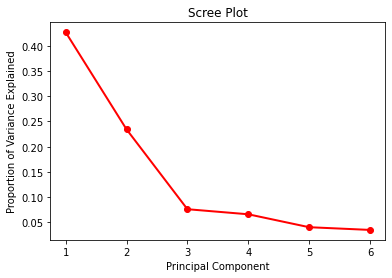

In [31]:
# Plot Values
# Drawn from: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The 'elbow' in the curve isn't as clear-cut as in many cases, but the diagram suggests that 2 or 3 may be sufficient. We can double check by exploring proportion of variance explained.

In [32]:
pca.explained_variance_

array([16.24022687,  8.90916887,  2.8808784 ,  2.49800384,  1.52189936,
        1.31769992])

In [33]:
pc_list = ['PC'+str(i) for i in range(1,7)]

In [36]:
# idea for this viz came from: https://www.reneshbedre.com/blog/principal-component-analysis.html
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


From the plot, it seems like 2 PCs account for most of the variance
The next task would be to see if these components are interpretable through their loadings. 

In [37]:
x.shape

(4152, 6)

In [38]:
len(vars.columns)

38

In [39]:
#So let's do the analysis again with just the 2 components
pca = PCA(n_components=2)
x = pca.fit_transform(raw)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=vars.columns)

In [40]:
loadings.T

,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer
PC1,0.083635,0.084239,0.042301,-0.017686,0.027143,0.068409,0.057055,0.239678,0.236835,0.083635,0.084239,-0.017686,0.027143,0.057055,0.042301,0.236835,0.240488,0.239663,0.239678,0.075841,0.239678,0.119089,0.239222,0.205568,0.240488,0.239663,0.240488,0.057122,0.239673,0.086567,0.02743,0.241420,0.206714,0.210086,0.018885,0.212969,0.052597,0.007198
PC2,-0.278864,-0.254422,-0.267870,0.196211,0.065572,-0.280171,-0.267623,0.066993,0.040362,-0.278864,-0.254422,0.196211,0.065572,-0.267623,-0.267870,0.040362,0.008446,-0.018007,0.066993,0.184987,0.066993,0.082243,0.050144,-0.116910,0.008446,-0.018007,0.008446,0.026976,-0.019898,0.206911,0.24783,0.062151,0.084506,0.069047,0.019379,0.041078,0.187845,0.175888


In [41]:
print(loadings['PC1'].max(), loadings['PC1'].min())

0.24142014399800543 -0.017686234320698338


In [42]:
print(loadings['PC2'].max(), loadings['PC2'].min())

0.24782966142526558 -0.2801710248220234


None of the loadings of principal components from the original variables are particularly strong. This makes interpretation challenging. Interestingly, PC2 has both a positive and negative loading of around 0.25.
Visualization may help.

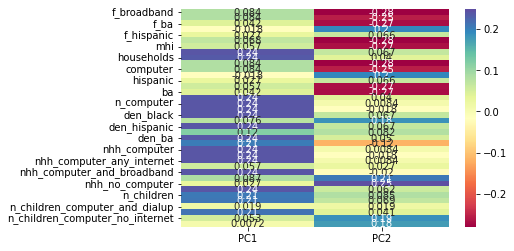

In [43]:
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

PC2 holds strong negative loadings with some demographic variables such as Monthly Household Income (mhi), number of families from hispanic and 'ba' backgrounds (not sure what 'ba' means). It also has a strong positive loadings correlation with the households that have no computers.

PC1 seems closely linked to variables with the 'nhh' prefix (I believe that's number of households, but we need to check the data dictionary)

# Part 2

In [ ]:
illinois_map = gpd.read_file('il_spdf/il_spdf.shp')

<AxesSubplot:>

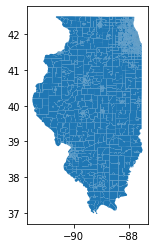

In [ ]:

illinois_map.plot()

<AxesSubplot:>

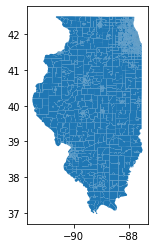

In [ ]:
#Using Coordinate Reference System
illinois_map.to_crs(epsg=4326).plot()

In [ ]:
# Check for Lat Long in the other data
df_fcc = pd.read_csv('fcc_477_census_tract_IL.csv')
#flatten the tract
df_fcc.columns
#tract and download speeds

Index(['tract', 'max_dn', 'max_up', 'dn10', 'dn100', 'dn250', 'fiber_100u',
       'state'],
      dtype='object')

In [ ]:
df_fcc['tract']

0       17001000100
1       17001000201
2       17001000202
3       17001000400
4       17001000500
           ...     
3117    17203030501
3118    17203030502
3119    17203030601
3120    17203030602
3121    17203030700
Name: tract, Length: 3122, dtype: int64

So no, the FCC data doesn't have the required lat-long.


In [ ]:
#Ookla
df_ookla = pd.read_csv('ookla_combined_il.csv')
df_ookla.columns

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'type', 'quarter', 'year', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID',
       'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'tile'],
      dtype='object')

In [ ]:
df_ookla.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile
0,302222301102001,138935,19002,14,80,11,fixed,Q1,2021,17,31,804607,1400000US17031804607,17031804607,8046.07,CT,3639628,7556,"list(c(-88.0609130859375, -88.055419921875, -8..."
1,302222123331111,146129,18342,16,91,16,fixed,Q1,2021,17,31,802610,1400000US17031802610,17031802610,8026.10,CT,1281200,0,"list(c(-87.8961181640625, -87.890625, -87.8906..."
2,302222123232303,219339,15092,14,204,27,fixed,Q1,2021,17,31,804712,1400000US17031804712,17031804712,8047.12,CT,2381498,58189,"list(c(-88.1268310546875, -88.121337890625, -8..."
3,302222221300031,49578,5120,12,4,2,fixed,Q1,2021,17,11,965400,1400000US17011965400,17011965400,9654.00,CT,27569428,0,"list(c(-89.4561767578125, -89.45068359375, -89..."
4,302222310233001,152302,98508,9,76,12,fixed,Q1,2021,17,31,820800,1400000US17031820800,17031820800,8208.00,CT,5632378,404692,"list(c(-87.7532958984375, -87.747802734375, -8..."


In [ ]:
df_ookla['tile']

0         list(c(-88.0609130859375, -88.055419921875, -8...
1         list(c(-87.8961181640625, -87.890625, -87.8906...
2         list(c(-88.1268310546875, -88.121337890625, -8...
3         list(c(-89.4561767578125, -89.45068359375, -89...
4         list(c(-87.7532958984375, -87.747802734375, -8...
                                ...                        
199792    list(c(-87.615966796875, -87.6104736328125, -8...
199793    list(c(-88.275146484375, -88.2696533203125, -8...
199794    list(c(-87.9949951171875, -87.989501953125, -8...
199795    list(c(-87.6983642578125, -87.69287109375, -87...
199796    list(c(-87.5830078125, -87.5775146484375, -87....
Name: tile, Length: 199797, dtype: object

In [ ]:
df_ookla['tile_length'] = df_ookla['tile'].apply(len)

In [ ]:
df_ookla['tile_length']

0         190
1         178
2         190
3         188
4         188
         ... 
199792    189
199793    189
199794    190
199795    188
199796    183
Name: tile_length, Length: 199797, dtype: int64

In [ ]:
df_ookla['tile_length'].describe()

count    199797.000000
mean        186.297016
std           4.143248
min         142.000000
25%         185.000000
50%         188.000000
75%         189.000000
max         190.000000
Name: tile_length, dtype: float64

Phew, these tiles are quite complex. I'm best leaving this to Steven and other team members to handle on Tableau and R while I figure out the data overlaps.

# Part 3- Checking for FCC and Ookla Joins

In [ ]:
print(len(df_fcc), len(df_ookla))

3122 199797


There are clearly huge differences in the number of quadkeys in Ookla vs the number of census tracts in Illinois. This suggests a close concentration of a huge number of quadkeys within census tracts. And that isn't even considering quadkeys that extends across more than one census tract.

In [ ]:
#Left Join Ookla
left_join = df_ookla.merge(df_fcc, how='left', left_on='GEOID', right_on='tract')

In [ ]:
left_join

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state
0,302222301102001,138935,19002,14,80,11,fixed,Q1,2021,17,31,804607,1400000US17031804607,17031804607,8046.07,CT,3639628,7556,"list(c(-88.0609130859375, -88.055419921875, -8...",190,17031804607,947.486111,33.834889,2.680556,1.375000,0.958333,0.000000,17
1,302222123331111,146129,18342,16,91,16,fixed,Q1,2021,17,31,802610,1400000US17031802610,17031802610,8026.10,CT,1281200,0,"list(c(-87.8961181640625, -87.890625, -87.8906...",178,17031802610,999.518519,49.444444,4.925926,3.555556,2.925926,0.000000,17
2,302222123232303,219339,15092,14,204,27,fixed,Q1,2021,17,31,804712,1400000US17031804712,17031804712,8047.12,CT,2381498,58189,"list(c(-88.1268310546875, -88.121337890625, -8...",190,17031804712,879.825397,43.253968,4.301587,3.000000,2.365079,0.000000,17
3,302222221300031,49578,5120,12,4,2,fixed,Q1,2021,17,11,965400,1400000US17011965400,17011965400,9654.00,CT,27569428,0,"list(c(-89.4561767578125, -89.45068359375, -89...",188,17011965400,704.130769,26.023077,3.330769,0.823077,0.700000,0.000000,17
4,302222310233001,152302,98508,9,76,12,fixed,Q1,2021,17,31,820800,1400000US17031820800,17031820800,8208.00,CT,5632378,404692,"list(c(-87.7532958984375, -87.747802734375, -8...",188,17031820800,766.280952,361.804571,2.552381,1.561905,1.076190,0.342857,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199792,320002310110012,2297,60,132,2,1,mobile,Q2,2021,17,59,972800,1400000US17059972800,17059972800,9728.00,CT,419852681,8795239,"list(c(-87.615966796875, -87.6104736328125, -8...",189,17059972800,583.457077,58.192575,1.914153,1.106729,0.584687,0.415313,17
199793,320002320311012,28478,5456,69,3,1,mobile,Q2,2021,17,151,971300,1400000US17151971300,17151971300,9713.00,CT,333545835,10811618,"list(c(-88.275146484375, -88.2696533203125, -8...",189,17151971300,140.398876,101.987461,1.814607,1.196629,0.028090,0.904494,17
199794,320002321103321,2989,1704,111,3,1,mobile,Q2,2021,17,69,971000,1400000US17069971000,17069971000,9710.00,CT,270330958,8628926,"list(c(-87.9949951171875, -87.989501953125, -8...",190,17069971000,102.247191,100.000000,1.033708,1.022472,0.000000,1.000000,17
199795,320002330100231,1787,142,76,4,3,mobile,Q2,2021,17,69,971000,1400000US17069971000,17069971000,9710.00,CT,270330958,8628926,"list(c(-87.6983642578125, -87.69287109375, -87...",188,17069971000,102.247191,100.000000,1.033708,1.022472,0.000000,1.000000,17


In [ ]:
# Here, ookla is the dataframe on the left.
missing_tract = left_join.loc[left_join['tract'].isnull()]
missing_tract

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state


Okay, so every single quadkey is in at least one tract. Let's try the reverse.

In [ ]:
right_join = df_ookla.merge(df_fcc, how='right', left_on='GEOID', right_on='tract')

In [ ]:
missing_geoid = right_join.loc[right_join['GEOID'].isnull()]
missing_geoid

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,tile_length,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state
19004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17019000401,988.733333,163.666667,2.333333,1.333333,1.133333,0.066667,17
24546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031010702,983.179487,74.358974,5.512821,4.358974,2.666667,0.025641,17
24547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031020100,981.257143,50.000000,5.228571,4.171429,2.571429,0.000000,17
24722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031030102,996.454545,136.363636,5.090909,4.000000,2.727273,0.090909,17
24723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17031030103,878.272727,136.363636,4.454545,3.545455,2.090909,0.090909,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17043841207,966.964286,82.857143,5.785714,3.428571,2.928571,0.035714,17
66649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17043846310,918.629630,318.380741,1.518519,1.222222,1.222222,0.296296,17
83992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17087980000,104.285714,86.714286,1.428571,1.142857,0.000000,0.857143,17
99613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17097863005,707.261905,25.335619,0.904762,0.714286,0.714286,0.000000,17


In [ ]:
tracts_missing_geoid = missing_geoid['tract']

All right, so there are 162 quadkeys that don't have a tract.

The next step would have been to plot against the shapefile and see which parts become blank. Steven is already taking care of that on Tableau. So I'll just compare the results of the right join with ACS and check for any patterns appearing with respect to our calculated principal components. 

# PART 3: Combine PCA and Table Join

In [ ]:
x.shape

(3110, 2)

In [ ]:
df_pc = pd.DataFrame(x, columns=['PC1', 'PC2'])

In [ ]:
df_pc

,PC1,PC2
0,1.497317,1.301854
1,-3.139994,-2.348765
2,-2.682123,-1.898867
3,-3.071674,2.027154
4,-4.897608,0.589507
...,...,...
3105,7.637506,0.655145
3106,-2.441929,-1.640678
3107,3.638448,1.903616
3108,-0.547540,-1.858193


In [ ]:
df_acs.shape

(3123, 43)

In [ ]:
df_acs.dropna().shape

(3110, 43)

In [ ]:
#Now that the dimensions agree, we can combine the Principal Components into this dataframe
df_acs.dropna(inplace=True)

In [ ]:
pc_acs = pd.concat([df_acs, df_pc], axis=1)

In [ ]:
pc_acs.shape

(3122, 45)

In [ ]:
pc_acs['PC2']

0       1.301854
1      -2.348765
2      -1.898867
3       2.027154
4       0.589507
          ...   
3118         NaN
3119         NaN
3120         NaN
3121         NaN
3122         NaN
Name: PC2, Length: 3122, dtype: float64

In [ ]:
pc_acs.tail(13)

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp,PC1,PC2
3109,17.0,201.0,4003.0,1.720100e+10,0.841,0.915,0.086,0.057,0.146,10.54,37689.0,2090.0,861.0,84.1,91.5,5.7,14.6,37689.0,8.6,861.0,788.0,724.0,2090.0,119.0,2090.0,306.0,1497.0,128.0,788.0,724.0,788.0,0.0,718.0,70.0,73.0,2090.0,494.0,465.0,0.0,452.0,13.0,29.0,17.0,-0.078621,0.432179
3110,17.0,201.0,4100.0,1.720100e+10,0.838,0.911,0.230,0.006,0.009,11.12,67708.0,5039.0,1986.0,83.8,91.1,0.6,0.9,67708.0,23.0,1986.0,1810.0,1665.0,5039.0,29.0,5039.0,46.0,3744.0,862.0,1810.0,1665.0,1810.0,14.0,1662.0,134.0,176.0,4956.0,947.0,947.0,0.0,883.0,64.0,0.0,17.0,NaN,NaN
3111,17.0,201.0,4200.0,1.720100e+10,0.885,0.928,0.258,0.026,0.015,11.34,84399.0,6217.0,2389.0,88.5,92.8,2.6,1.5,84399.0,25.8,2389.0,2216.0,2115.0,6217.0,159.0,6217.0,94.0,4137.0,1068.0,2216.0,2115.0,2216.0,40.0,2054.0,122.0,173.0,6217.0,1498.0,1493.0,11.0,1418.0,64.0,5.0,17.0,NaN,NaN
3112,17.0,201.0,4300.0,1.720100e+10,0.850,0.924,0.265,0.034,0.018,11.30,80504.0,4981.0,2005.0,85.0,92.4,3.4,1.8,80504.0,26.5,2005.0,1852.0,1705.0,4981.0,167.0,4981.0,90.0,3331.0,882.0,1852.0,1705.0,1852.0,22.0,1705.0,125.0,153.0,4981.0,1170.0,1170.0,0.0,1167.0,3.0,0.0,17.0,NaN,NaN
3114,17.0,203.0,30100.0,1.720303e+10,0.760,0.856,0.167,0.005,0.010,11.07,63929.0,2544.0,986.0,76.0,85.6,0.5,1.0,63929.0,16.7,986.0,844.0,749.0,2544.0,12.0,2544.0,26.0,1803.0,301.0,844.0,749.0,844.0,6.0,744.0,94.0,142.0,2544.0,570.0,525.0,0.0,498.0,27.0,45.0,17.0,NaN,NaN
3115,17.0,203.0,30200.0,1.720303e+10,0.816,0.883,0.174,0.008,0.001,11.05,62857.0,2903.0,1150.0,81.6,88.3,0.8,0.1,62857.0,17.4,1150.0,1015.0,938.0,2903.0,23.0,2903.0,4.0,1915.0,334.0,1015.0,938.0,1015.0,9.0,932.0,74.0,135.0,2840.0,753.0,753.0,0.0,722.0,31.0,0.0,17.0,NaN,NaN
3116,17.0,203.0,30300.0,1.720303e+10,0.830,0.888,0.232,0.005,0.058,11.13,68000.0,2924.0,1078.0,83.0,88.8,0.5,5.8,68000.0,23.2,1078.0,957.0,895.0,2924.0,15.0,2924.0,169.0,2030.0,470.0,957.0,895.0,957.0,9.0,887.0,61.0,121.0,2869.0,687.0,687.0,0.0,668.0,19.0,0.0,17.0,NaN,NaN
3117,17.0,203.0,30400.0,1.720303e+10,0.893,0.913,0.378,0.011,0.012,11.23,75317.0,5751.0,2215.0,89.3,91.3,1.1,1.2,75317.0,37.8,2215.0,2023.0,1977.0,5751.0,66.0,5751.0,70.0,3842.0,1452.0,2023.0,1977.0,2023.0,14.0,1961.0,48.0,192.0,5655.0,1460.0,1460.0,0.0,1442.0,18.0,0.0,17.0,NaN,NaN
3118,17.0,203.0,30501.0,1.720303e+10,0.886,0.942,0.526,0.014,0.017,11.52,100875.0,7795.0,2758.0,88.6,94.2,1.4,1.7,100875.0,52.6,2758.0,2597.0,2443.0,7795.0,109.0,7795.0,134.0,5199.0,2734.0,2597.0,2443.0,2597.0,13.0,2409.0,175.0,161.0,7777.0,2110.0,2029.0,0.0,1902.0,127.0,81.0,17.0,NaN,NaN
3119,17.0,203.0,30502.0,1.720303e+10,0.833,0.906,0.168,0.002,0.015,11.02,61293.0,2500.0,1084.0,83.3,90.6,0.2,1.5,61293.0,16.8,1084.0,982.0,903.0,2500.0,4.0,2500.0,37.0,1892.0,318.0,982.0,903.0,982.0,10.0,887.0,85.0,102.0,2500.0,464.0,461.0,3.0,453.0,5.0,3.0,17.0,NaN,NaN


In [ ]:
final = pc_acs.dropna()[['geoid', 'PC1', 'PC2']]

In [ ]:
final.shape

(3098, 3)

In [ ]:
tracts_missing_geoid

19004     17019000401
24546     17031010702
24547     17031020100
24722     17031030102
24723     17031030103
             ...     
60104     17043841207
66649     17043846310
83992     17087980000
99613     17097863005
146831    17143000200
Name: tract, Length: 162, dtype: int64

In [ ]:
final_tracts = final.loc[final['geoid'].isin(tracts_missing_geoid)]
final_tracts

,geoid,PC1,PC2
61,1.701900e+10,-4.147106,-1.708102
149,1.703101e+10,2.338989,2.235506
150,1.703102e+10,-0.442424,-0.214740
165,1.703103e+10,0.001330,-1.673868
166,1.703103e+10,-2.971966,-3.121602
...,...,...,...
1445,1.703184e+10,-3.206711,-0.640514
1448,1.703184e+10,-3.285381,4.509451
1537,1.704384e+10,1.645455,-3.624700
1681,1.704385e+10,1.415305,-3.216900


In [ ]:
#Hmm this raises the question of what happened to 3 of the original 162 tracts
final_tracts.describe()

,geoid,PC1,PC2
count,1.590000e+02,159.000000,159.000000
mean,1.703214e+10,-1.561520,-0.614374
std,9.016042e+06,3.795687,3.519825
min,1.701900e+10,-8.884847,-7.259608
25%,1.703108e+10,-3.957328,-3.571017
50%,1.703128e+10,-1.649575,-0.944530
75%,1.703161e+10,0.339239,2.257449
max,1.714300e+10,15.050688,7.506334


In [ ]:
matched_tracts = pc_acs.loc[~pc_acs['geoid'].isin(tracts_missing_geoid)]
matched_tracts.dropna(inplace=True)

<ipython-input-278-a9b0a6f5aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_tracts.dropna(inplace=True)


In [ ]:
matched_tracts[['PC1', 'PC2']].describe()

,PC1,PC2
count,2939.000000,2939.000000
mean,0.085177,0.033420
std,4.134558,2.720536
min,-9.198378,-8.387806
25%,-2.547969,-1.662850
50%,-0.250762,0.000920
75%,2.308634,1.684530
max,42.973177,17.152428


The values on the PC have switched signs between the matched and unmatched tracts. It might be worthwhile testing for a statistically significant difference.

Before we can run a formal statistical test, we need to ensure we meet the underlying assumptions. We will check for normality (or near-normality) of the distributions of the two components

<AxesSubplot:xlabel='PC1', ylabel='Count'>

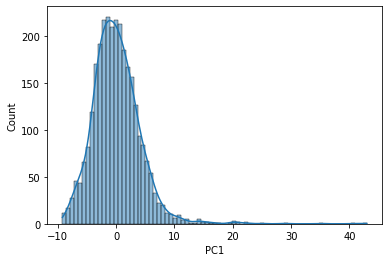

In [ ]:
sns.histplot(data=matched_tracts, x="PC1", kde=True)

This distribution is right-skewed with a thin tail. The outliers may be worth exploring, or removing from the analysis.

<AxesSubplot:xlabel='PC2', ylabel='Count'>

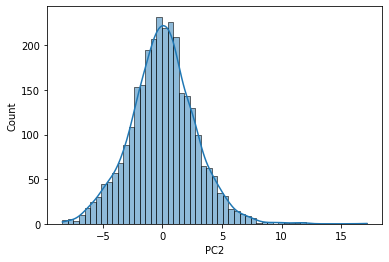

In [ ]:
sns.histplot(data=matched_tracts, x="PC2", kde=True)

The plot seems more symmetric than the one above and seems to be approaching a standard normal distribution.

<AxesSubplot:xlabel='PC1', ylabel='Count'>

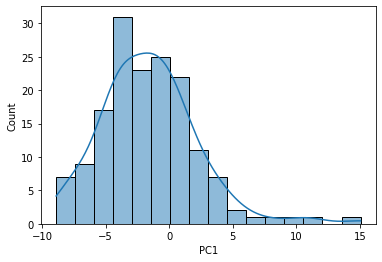

In [ ]:
sns.histplot(data=final_tracts, x="PC1", kde=True)

<AxesSubplot:xlabel='PC2', ylabel='Count'>

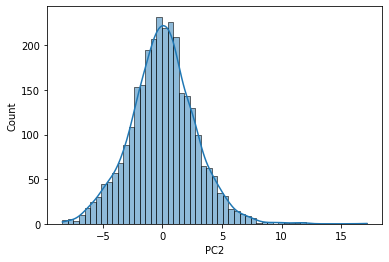

In [ ]:
sns.histplot(data=matched_tracts, x="PC2", kde=True)

The same pattern appears for PC1 (skewed) vs PC2 (more symmetric).  There may be a need to run some transformations on PC1 before the t-test's validity in this context becomes sacrosanct. 

In [ ]:
from scipy.stats import ttest_ind
print(ttest_ind(matched_tracts['PC1'], final_tracts['PC1']))

Ttest_indResult(statistic=4.911242055709674, pvalue=9.519433644524987e-07)


In [ ]:
print(ttest_ind(matched_tracts['PC2'], final_tracts['PC2']))

Ttest_indResult(statistic=2.8753971829124185, pvalue=0.004062746841136681)


The p value is highly statistically significant for both the t Tests. So the two groups are drawn from different populations along the two variables (principal components) of interest. 
So if we are able to now plot these tracts on Illinois maps, and develop an interpretation of the two principal components, we may be able to arrive at some metrics as required by part iii of this problem. 